### Importación de datos



In [36]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



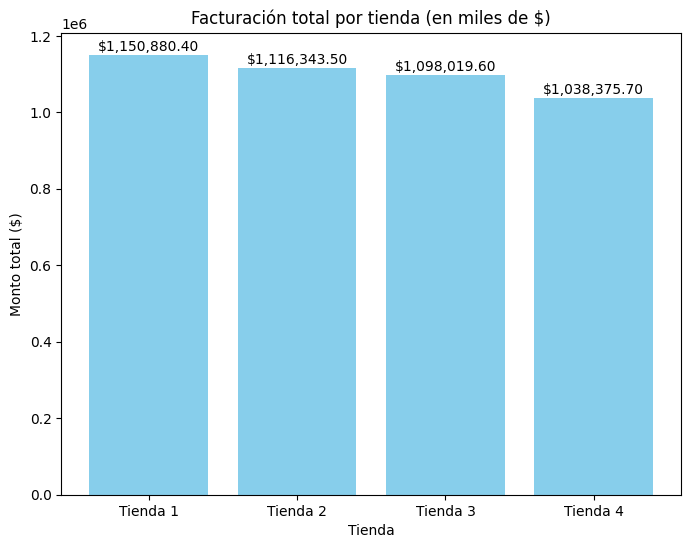

In [37]:
import matplotlib.pyplot as plt


facturacion = {
    "Tienda 1": tienda["Precio"].sum() / 1000,
    "Tienda 2": tienda2["Precio"].sum() / 1000,
    "Tienda 3": tienda3["Precio"].sum() / 1000,
    "Tienda 4": tienda4["Precio"].sum() / 1000
}

plt.figure(figsize=(8,6))
plt.bar(facturacion.keys(), facturacion.values(), color="skyblue")
plt.title("Facturación total por tienda (en miles de $)")
plt.ylabel("Monto total ($)")
plt.xlabel("Tienda")
for i, v in enumerate(facturacion.values()):
    plt.text(i, v + 10000, f"${v:,.2f}", ha='center')
plt.show()


# 2. Ventas por categoría

Ventas por categoría - Tienda 1:
Artículos para el hogar: $12,698.40
Deportes y diversión: $39,290.00
Electrodomésticos: $363,685.20
Electrónicos: $429,493.50
Instrumentos musicales: $91,299.00
Juguetes: $17,995.70
Libros: $8,784.90
Muebles: $187,633.70

Ventas por categoría - Tienda 2:
Artículos para el hogar: $14,746.90
Deportes y diversión: $34,744.50
Electrodomésticos: $348,567.80
Electrónicos: $410,831.10
Instrumentos musicales: $104,990.30
Juguetes: $15,945.40
Libros: $10,091.20
Muebles: $176,426.30

Ventas por categoría - Tienda 3:
Artículos para el hogar: $15,060.00
Deportes y diversión: $35,593.10
Electrodomésticos: $329,237.90
Electrónicos: $410,775.80
Instrumentos musicales: $77,380.90
Juguetes: $19,401.10
Libros: $9,498.70
Muebles: $201,072.10

Ventas por categoría - Tienda 4:
Artículos para el hogar: $15,074.50
Deportes y diversión: $33,350.10
Electrodomésticos: $283,260.20
Electrónicos: $409,476.10
Instrumentos musicales: $75,102.40
Juguetes: $20,262.20
Libros: $9,321.30


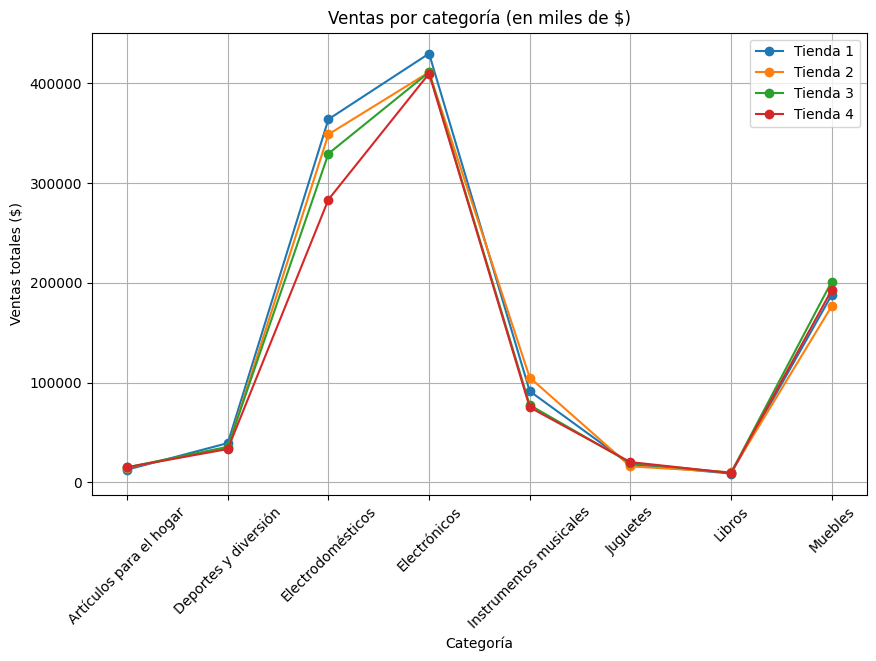

In [38]:

factor_ajuste = 1000

ventas_categoria_tienda1 = tienda.groupby("Categoría del Producto")["Precio"].sum() / factor_ajuste
ventas_categoria_tienda2 = tienda2.groupby("Categoría del Producto")["Precio"].sum() / factor_ajuste
ventas_categoria_tienda3 = tienda3.groupby("Categoría del Producto")["Precio"].sum() / factor_ajuste
ventas_categoria_tienda4 = tienda4.groupby("Categoría del Producto")["Precio"].sum() / factor_ajuste

# Mostrar resultados en formato $00.00
print("Ventas por categoría - Tienda 1:")
for categoria, valor in ventas_categoria_tienda1.items():
    print(f"{categoria}: ${valor:,.2f}")

print("\nVentas por categoría - Tienda 2:")
for categoria, valor in ventas_categoria_tienda2.items():
    print(f"{categoria}: ${valor:,.2f}")

print("\nVentas por categoría - Tienda 3:")
for categoria, valor in ventas_categoria_tienda3.items():
    print(f"{categoria}: ${valor:,.2f}")

print("\nVentas por categoría - Tienda 4:")
for categoria, valor in ventas_categoria_tienda4.items():
    print(f"{categoria}: ${valor:,.2f}")

# Gráficos

categorias = tienda["Categoría del Producto"].unique()

ventas_por_categoria = pd.DataFrame({
    "Tienda 1": tienda.groupby("Categoría del Producto")["Precio"].sum() / 1000,
    "Tienda 2": tienda2.groupby("Categoría del Producto")["Precio"].sum() / 1000,
    "Tienda 3": tienda3.groupby("Categoría del Producto")["Precio"].sum() / 1000,
    "Tienda 4": tienda4.groupby("Categoría del Producto")["Precio"].sum() / 1000
})

ventas_por_categoria.plot(kind="line", marker='o', figsize=(10,6))
plt.title("Ventas por categoría (en miles de $)")
plt.ylabel("Ventas totales ($)")
plt.xlabel("Categoría")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



# 3. Calificación promedio de la tienda


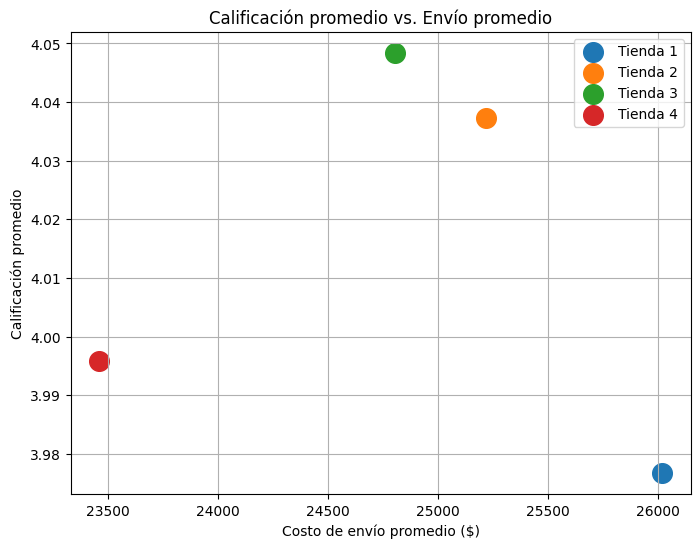

In [39]:


calificacion_promedio = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

envio_promedio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

plt.figure(figsize=(8,6))
for tienda_nombre in calificacion_promedio.keys():
    plt.scatter(envio_promedio[tienda_nombre], calificacion_promedio[tienda_nombre], s=200, label=tienda_nombre)

plt.title("Calificación promedio vs. Envío promedio")
plt.xlabel("Costo de envío promedio ($)")
plt.ylabel("Calificación promedio")
plt.legend()
plt.grid(True)
plt.show()



# 4. Productos más y menos vendidos

In [40]:

mas_vendido = {
    "Tienda 1": tienda.groupby("Producto")["Precio"].count().idxmax(),
    "Tienda 2": tienda2.groupby("Producto")["Precio"].count().idxmax(),
    "Tienda 3": tienda3.groupby("Producto")["Precio"].count().idxmax(),
    "Tienda 4": tienda4.groupby("Producto")["Precio"].count().idxmax()
}

menos_vendido = {
    "Tienda 1": tienda.groupby("Producto")["Precio"].count().idxmin(),
    "Tienda 2": tienda2.groupby("Producto")["Precio"].count().idxmin(),
    "Tienda 3": tienda3.groupby("Producto")["Precio"].count().idxmin(),
    "Tienda 4": tienda4.groupby("Producto")["Precio"].count().idxmin()
}

print("Producto más vendido por tienda:")
for k, v in mas_vendido.items():
    print(f"{k}: {v}")

print("\nProducto menos vendido por tienda:")
for k, v in menos_vendido.items():
    print(f"{k}: {v}")


Producto más vendido por tienda:
Tienda 1: Armario
Tienda 2: Iniciando en programación
Tienda 3: Kit de bancas
Tienda 4: Cama box

Producto menos vendido por tienda:
Tienda 1: Auriculares con micrófono
Tienda 2: Juego de mesa
Tienda 3: Bloques de construcción
Tienda 4: Guitarra eléctrica


# 5. Envío promedio por tienda

Envío promedio por tienda:
Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


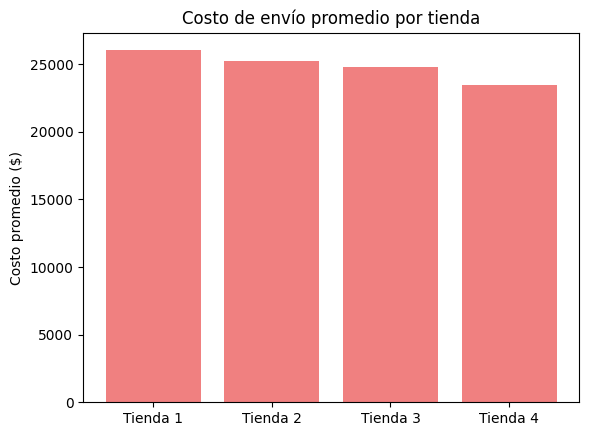

In [41]:
# Envío promedio por tienda
envio_promedio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

# Mostrar resultados en formato $00.00
print("Envío promedio por tienda:")
for k, v in envio_promedio.items():
    print(f"{k}: ${v:,.2f}")

# Gráfico
plt.bar(envio_promedio.keys(), envio_promedio.values(), color="lightcoral")
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo promedio ($)")
plt.show()


# 6. Grafico general


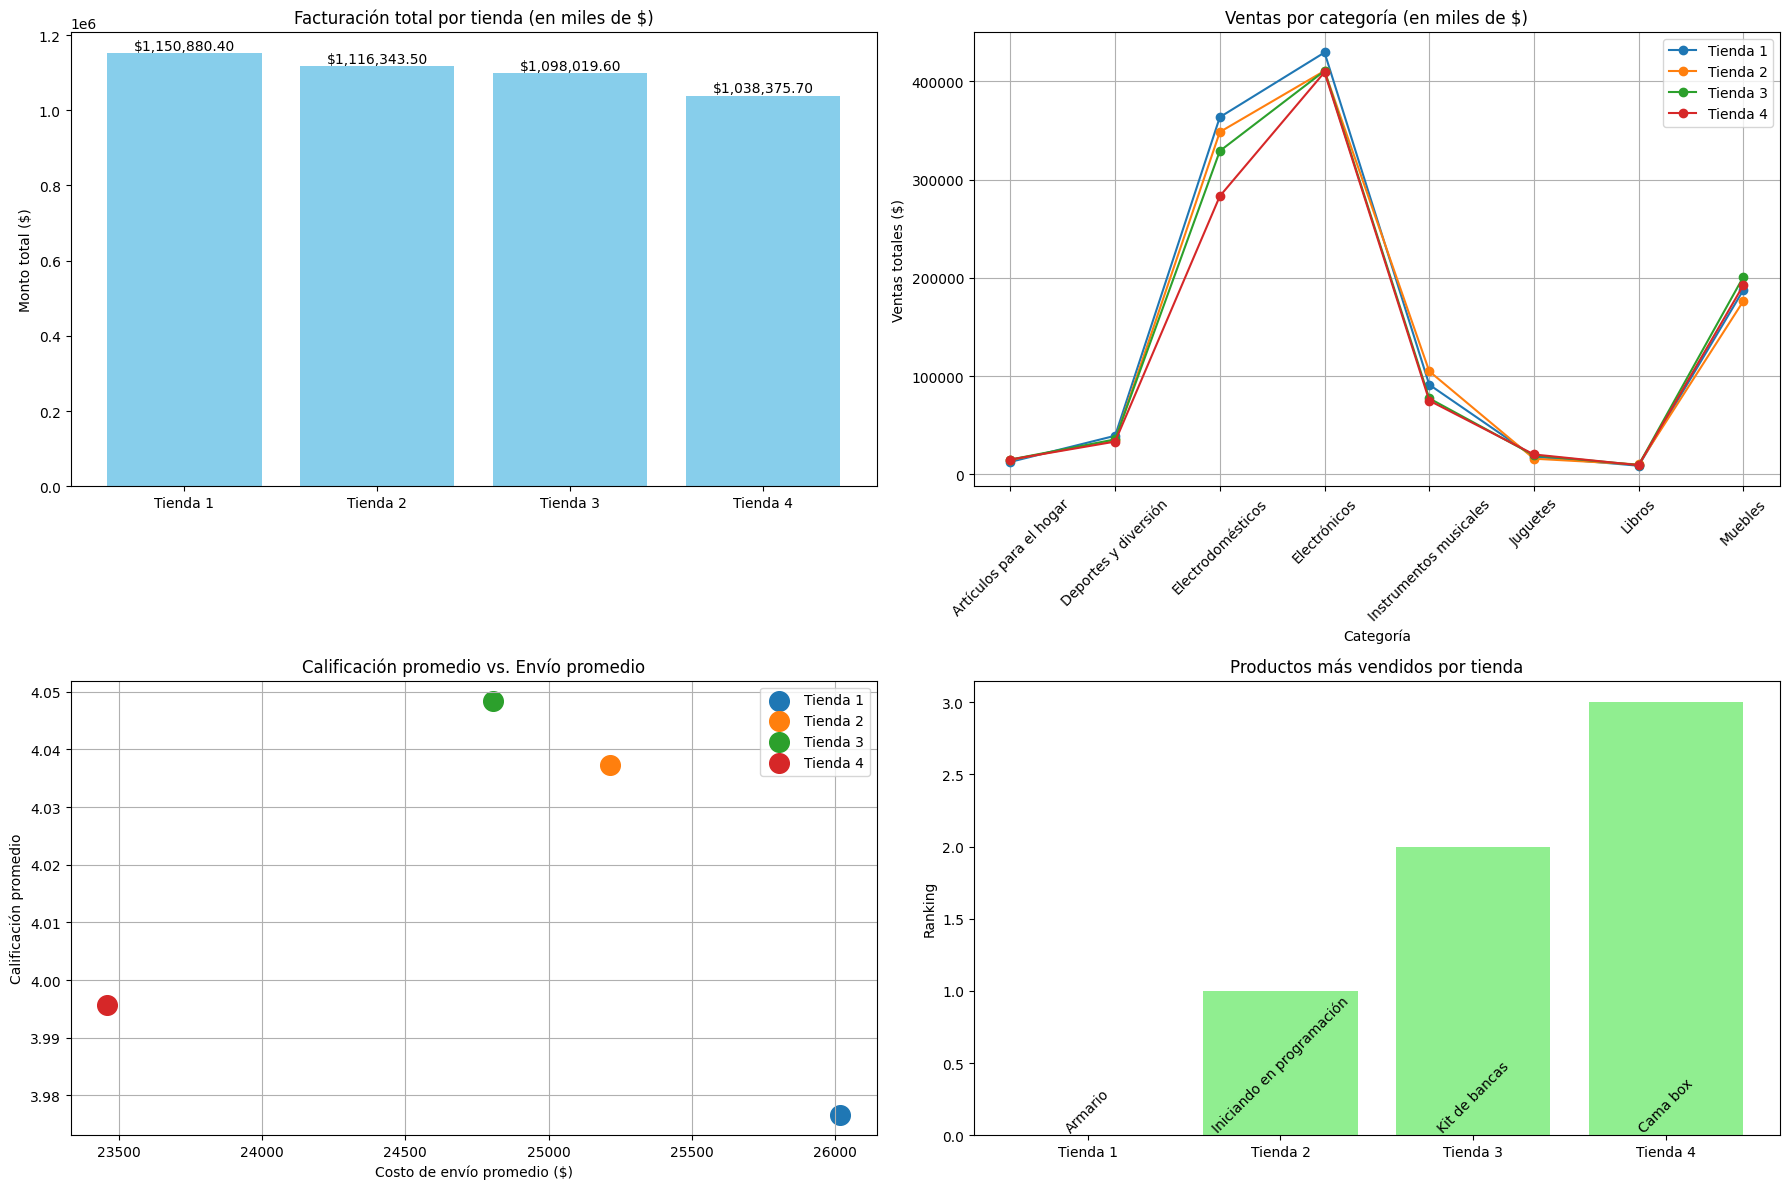

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Facturación ajustada (miles de $)
facturacion = {
    "Tienda 1": tienda["Precio"].sum() / 1000,
    "Tienda 2": tienda2["Precio"].sum() / 1000,
    "Tienda 3": tienda3["Precio"].sum() / 1000,
    "Tienda 4": tienda4["Precio"].sum() / 1000
}

# Ventas por categoría ajustadas (miles de $)
ventas_por_categoria = pd.DataFrame({
    "Tienda 1": tienda.groupby("Categoría del Producto")["Precio"].sum() / 1000,
    "Tienda 2": tienda2.groupby("Categoría del Producto")["Precio"].sum() / 1000,
    "Tienda 3": tienda3.groupby("Categoría del Producto")["Precio"].sum() / 1000,
    "Tienda 4": tienda4.groupby("Categoría del Producto")["Precio"].sum() / 1000
})

# Calificación promedio
calificacion_promedio = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

# Envío promedio
envio_promedio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(18,12))

# 1️⃣ Facturación total
axes[0,0].bar(facturacion.keys(), facturacion.values(), color="skyblue")
axes[0,0].set_title("Facturación total por tienda (en miles de $)")
axes[0,0].set_ylabel("Monto total ($)")
for i, v in enumerate(facturacion.values()):
    axes[0,0].text(i, v + 10000, f"${v:,.2f}", ha='center')

# 2️⃣ Ventas por categoría
ventas_por_categoria.plot(kind="line", marker='o', ax=axes[0,1])
axes[0,1].set_title("Ventas por categoría (en miles de $)")
axes[0,1].set_ylabel("Ventas totales ($)")
axes[0,1].set_xlabel("Categoría")
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True)

# 3️⃣ Calificación promedio vs Envío promedio (scatter)
for tienda_nombre in calificacion_promedio.keys():
    axes[1,0].scatter(envio_promedio[tienda_nombre], calificacion_promedio[tienda_nombre],
                      s=200, label=tienda_nombre)
axes[1,0].set_title("Calificación promedio vs. Envío promedio")
axes[1,0].set_xlabel("Costo de envío promedio ($)")
axes[1,0].set_ylabel("Calificación promedio")
axes[1,0].legend()
axes[1,0].grid(True)

# 4️⃣ Productos más vendidos por tienda (opcional)
productos_mas_vendidos = {
    "Tienda 1": tienda.groupby("Producto")["Precio"].count().idxmax(),
    "Tienda 2": tienda2.groupby("Producto")["Precio"].count().idxmax(),
    "Tienda 3": tienda3.groupby("Producto")["Precio"].count().idxmax(),
    "Tienda 4": tienda4.groupby("Producto")["Precio"].count().idxmax()
}
axes[1,1].bar(productos_mas_vendidos.keys(), range(len(productos_mas_vendidos)), color="lightgreen")
axes[1,1].set_title("Productos más vendidos por tienda")
axes[1,1].set_ylabel("Ranking")
for i, (k, v) in enumerate(productos_mas_vendidos.items()):
    axes[1,1].text(i, 0, v, ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()


Informe
***Facturación total:***

La Tienda 1 tuvo la mayor facturación, seguida por la Tienda 2, la Tienda 3 y la Tienda 4.
Esto muestra cuáles tiendas venden más en general.


***Ventas por categoría:***

Los productos que más se vendieron fueron Electrónicos y Electrodomésticos.
Los que menos se vendieron fueron Libros y Artículos para el hogar.

***Calificación y envío:***

La tienda con mejor calificación se destaca en los gráficos.

Se puede observar si las tiendas con envíos más caros tienen mejor o peor calificación de los clientes.

***Productos más vendidos:***

Cada tienda tiene productos estrella que se venden mucho.
También se pueden identificar los productos menos elegidos.


***Conclusión:***

Los gráficos muestran qué tiendas venden más, qué productos son más populares y cómo están calificadas.
Esto sirve para tomar decisiones sobre ventas, stock y atención al cliente.